In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./yellow_cab_data/yellow_cab_data.csv")
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2022-01-01 00:17:55,2022-01-01 00:27:45,1.0,4.22,1.0,N,138,92,2,14.00,0.5,0.5,0.00,0.00,0.3,16.55,0.0,1.25
1,2,2022-01-01 00:22:03,2022-01-01 00:25:37,1.0,0.69,1.0,N,236,262,1,4.50,0.5,0.5,1.66,0.00,0.3,9.96,2.5,0.00
2,2,2022-01-01 00:52:33,2022-01-01 00:58:07,1.0,0.87,1.0,N,141,229,1,5.50,0.5,0.5,2.32,0.00,0.3,11.62,2.5,0.00
3,2,2022-01-01 00:31:12,2022-01-02 00:00:58,1.0,3.03,1.0,N,79,261,2,15.00,0.5,0.5,0.00,0.00,0.3,18.80,2.5,0.00
4,2,2022-01-01 00:05:26,2022-01-01 00:29:05,1.0,4.56,1.0,N,50,79,1,18.50,0.5,0.5,4.46,0.00,0.3,26.76,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2,2022-01-31 23:13:58,2022-01-31 23:35:37,NaN,5.58,NaN,NaN,158,262,0,24.63,0.0,0.5,2.00,0.00,0.3,29.93,NaN,NaN
149996,2,2022-01-31 23:31:00,2022-01-31 23:43:00,NaN,1.67,NaN,NaN,164,50,0,9.36,0.0,0.5,1.35,0.00,0.3,14.01,NaN,NaN
149997,2,2022-01-31 23:10:00,2022-01-31 23:20:00,NaN,2.02,NaN,NaN,170,50,0,10.40,0.0,0.5,1.46,0.00,0.3,15.16,NaN,NaN
149998,2,2022-01-31 23:53:00,2022-02-01 00:10:00,NaN,4.84,NaN,NaN,158,265,0,23.71,0.0,0.0,7.69,11.75,0.3,43.45,NaN,NaN


In [2]:
def analysis_continuous(col_vals):
    return np.nanmean(col_vals), np.nanvar(col_vals)

In [3]:
df.columns, len(list(df.columns))

(Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
        'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
        'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
        'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
        'total_amount', 'congestion_surcharge', 'airport_fee'],
       dtype='object'),
 19)

In [4]:
def datatype(x):
    return type(x)

datatypes = []
for col in df.columns:
    datatypes.append(str(type(df.loc[0,col])))

In [5]:
categ = []
for i in range(len(datatypes)):
    t = datatypes[i]
    if t == "<class 'numpy.int64'>" or t == "<class 'numpy.float64'>":
        pass
    else:    
        categ.append(df.columns[i])

categ

['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag']

In [6]:
# convert datetimes to integer values
df['tpep_pickup_float'] = pd.to_datetime(df[categ[0]]).map(pd.Timestamp.timestamp)
df['tpep_dropoff_float'] = pd.to_datetime(df[categ[1]]).map(pd.Timestamp.timestamp)

In [7]:
#convert binary store and fwd flag to int
def convert_yn(x):
    if x=="Y":
        return 1
    elif x=="N":
        return 0
    else:
        return np.nan
df['store_and_fwd_flag_bin'] = df[categ[2]].apply(convert_yn)


In [8]:
data = df.drop(categ, axis=1)
data

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,tpep_pickup_float,tpep_dropoff_float,store_and_fwd_flag_bin
0,2,1.0,4.22,1.0,138,92,2,14.00,0.5,0.5,0.00,0.00,0.3,16.55,0.0,1.25,1.640996e+09,1.640997e+09,0.0
1,2,1.0,0.69,1.0,236,262,1,4.50,0.5,0.5,1.66,0.00,0.3,9.96,2.5,0.00,1.640997e+09,1.640997e+09,0.0
2,2,1.0,0.87,1.0,141,229,1,5.50,0.5,0.5,2.32,0.00,0.3,11.62,2.5,0.00,1.640998e+09,1.640999e+09,0.0
3,2,1.0,3.03,1.0,79,261,2,15.00,0.5,0.5,0.00,0.00,0.3,18.80,2.5,0.00,1.640997e+09,1.641082e+09,0.0
4,2,1.0,4.56,1.0,50,79,1,18.50,0.5,0.5,4.46,0.00,0.3,26.76,2.5,0.00,1.640996e+09,1.640997e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2,NaN,5.58,NaN,158,262,0,24.63,0.0,0.5,2.00,0.00,0.3,29.93,NaN,NaN,1.643671e+09,1.643672e+09,NaN
149996,2,NaN,1.67,NaN,164,50,0,9.36,0.0,0.5,1.35,0.00,0.3,14.01,NaN,NaN,1.643672e+09,1.643673e+09,NaN
149997,2,NaN,2.02,NaN,170,50,0,10.40,0.0,0.5,1.46,0.00,0.3,15.16,NaN,NaN,1.643671e+09,1.643671e+09,NaN
149998,2,NaN,4.84,NaN,158,265,0,23.71,0.0,0.0,7.69,11.75,0.3,43.45,NaN,NaN,1.643673e+09,1.643674e+09,NaN


In [9]:
def sample_aggregate(data, epsilon, column_name='total_amount', block_size=3000):

    # get mean and std of 80% data.
    mean = np.mean(data[column_name])
    std = np.std(data[column_name])

    # get min and max bounds.
    min_bound = mean - std
    max_bound = mean + std

    # get 80% data for aggregation.
    data = data.to_numpy()
    partitioned_data = np.reshape(data[3000:,], (len(data[3000:,]) // block_size, block_size, -1))

    # run the algorithm.
    O = np.mean(partitioned_data[:, :, -6], axis=1, keepdims=False)
    for i in range(partitioned_data.shape[0]):
        if O[i] > max_bound:
            O[i] = max_bound
        if O[i] < min_bound:
            O[i] = min_bound

    A = np.mean(O) + np.random.laplace(scale = np.abs(max_bound - min_bound) / (len(O) * epsilon))
    return A

sample_aggregate(data, 1)

18.297910903412173

In [10]:
def test_accuracy(data, epsilon=1, block_size=3000, column_name='total_amount', num_iterations=1000):

    # actual mean and std.
    mean = np.mean(data[column_name])
    std = np.std(data[column_name])
    mean_range = np.array([mean - 0.075 * std, mean + 0.075 * std])

    # create variables for determining empirical accuracy.
    total, correct = 0, 0

    for _ in range(num_iterations):
        total += 1
        A = sample_aggregate(data, epsilon, column_name, block_size)
        if (A < mean_range[-1] and A > mean_range[0]):
            correct += 1
    return correct / total

0.837

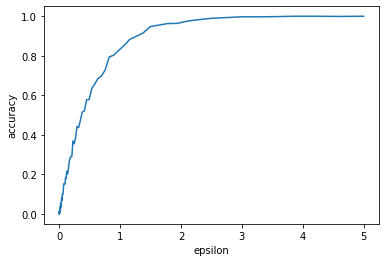

In [15]:
def plot_accuracies(data, num_epsilons):

    epsilons = np.linspace(0.001, 5, num=num_epsilons)

    accuracies = []
    for i in range(len(epsilons)):
        accuracies.append(test_accuracy(data, epsilons[i]))
        
    plt.plot(epsilons, accuracies)
    plt.xlabel('epsilon')
    plt.ylabel('accuracy')
    plt.show()

plot_accuracies(data, 100)